In [1]:
import pandas as pd
import numpy as np
df_n = pd.read_csv("neutral.csv")
df_o = pd.read_csv("others.csv")
data = pd.read_csv("dataset.csv")
data = data.iloc[:,1:]

data = data.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

emotion = df_o.iloc[:,4]
print(data)

             0          1          2           3          4          5  \
0    37.275390   7.091289  22.408050   75.057394  79.186066  64.777248   
1    35.058061   6.383887  25.934039   94.483698  74.751924  62.586091   
2    30.905026   9.543419  24.383575  110.813165  80.922596  62.023324   
3    40.219710  11.092948  28.819444  106.647611  83.829976  70.150141   
4    48.587126  10.244982  32.699414   80.045979  74.229954  75.716847   
..         ...        ...        ...         ...        ...        ...   
975  34.882828   7.230665  20.815900   55.806705  82.957266  68.510759   
976  44.270820  13.509723  25.003323   78.366010  88.762473  78.358998   
977  44.896504  12.265393  23.487181   81.537653  89.039486  73.183996   
978  49.432277  14.466538  26.174688   88.513804  97.088641  79.552537   
979  40.390815  11.538288  19.900956   70.186600  64.564352  70.835693   

             6           7          8  
0    66.257605  145.292062  15.107924  
1    77.136361  135.388626  14.

In [1]:
import pandas as pd
from matplotlib import pyplot
from keras.models import Sequential
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization,Activation,Average
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

import pandas as pd
from matplotlib import pyplot
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def create_model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 7
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)

    #the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
    conv2_2 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)

  

    #the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop2_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)

  

    #Flatten and output
    flatten = Flatten(name = 'flatten')(drop4_1)
    output = Dense(64, activation='relu', name = 'output')(flatten)

    # create model 
    model = Model(inputs =visible, outputs = output)
    # summary layers
    
    
    return model


def create_model_lite():
    input_shape=(48,48,1)

    model = Sequential()
    model.add(Conv2D(64, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (5, 5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
  
    
    
    
    return model

def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(32,input_shape=(9,), activation='relu'))
	
	
	
	return model


In [2]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from random import shuffle
import tensorflow as tf
import os
import cv2

def _load_KDEF():
        class_to_arg = {'AN': 0, 'DI': 1, 'AF': 2, 'HA': 3, 'SA': 4, 'SU': 5, 'NE': 6}
        num_classes = len(class_to_arg)

        file_paths = df_o.iloc[:,2]
        
        num_faces = len(file_paths)
        neutral_count = 0
        cc=0
        y_size, x_size = (48, 48)
        faces = np.zeros(shape=(num_faces, y_size, x_size))
        face_data = np.zeros(shape=(980, y_size, x_size))
        neutral_faces = np.zeros(shape=(int(num_faces/5), y_size, x_size))
        neutral_paths = []

        face_data = []
        emotions = np.zeros(shape=(num_faces, num_classes))
        for file_arg, file_path in enumerate(file_paths):
            image_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image_array = cv2.resize(image_array, (y_size, x_size))
            faces[file_arg] = image_array
            file_basename = os.path.basename(file_path)
            file_emotion = file_basename[4:6]
            file_angle = file_basename[6]
           
            try:
                emotion_arg = class_to_arg[file_emotion]
            except:
                continue
            emotions[file_arg, emotion_arg] = 1
        faces = np.expand_dims(faces, -1)
        return file_paths,neutral_paths,neutral_faces,faces, emotions

file_paths,neutral_paths,neutral_faces,faces, emotions = _load_KDEF()
print(faces.shape)

NameError: name 'df_o' is not defined

In [16]:
from keras.layers import add

model1 = create_model_lite()
print(model1.summary())
model2 = baseline_model()
print(model2.summary())



def create_final_model():
    merged_output = add([model1.output, model2.output])   
    model_combined = Sequential()
    model_combined.add(Activation('relu'))
    model_combined.add(Dense(32))
    model_combined.add(Activation('relu'))
    model_combined.add(Dense(7, activation='softmax'))
    final_model = Model([model1.input, model2.input], model_combined(merged_output))
    return final_model





# final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

final = create_final_model()
final.summary()





Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 128)      

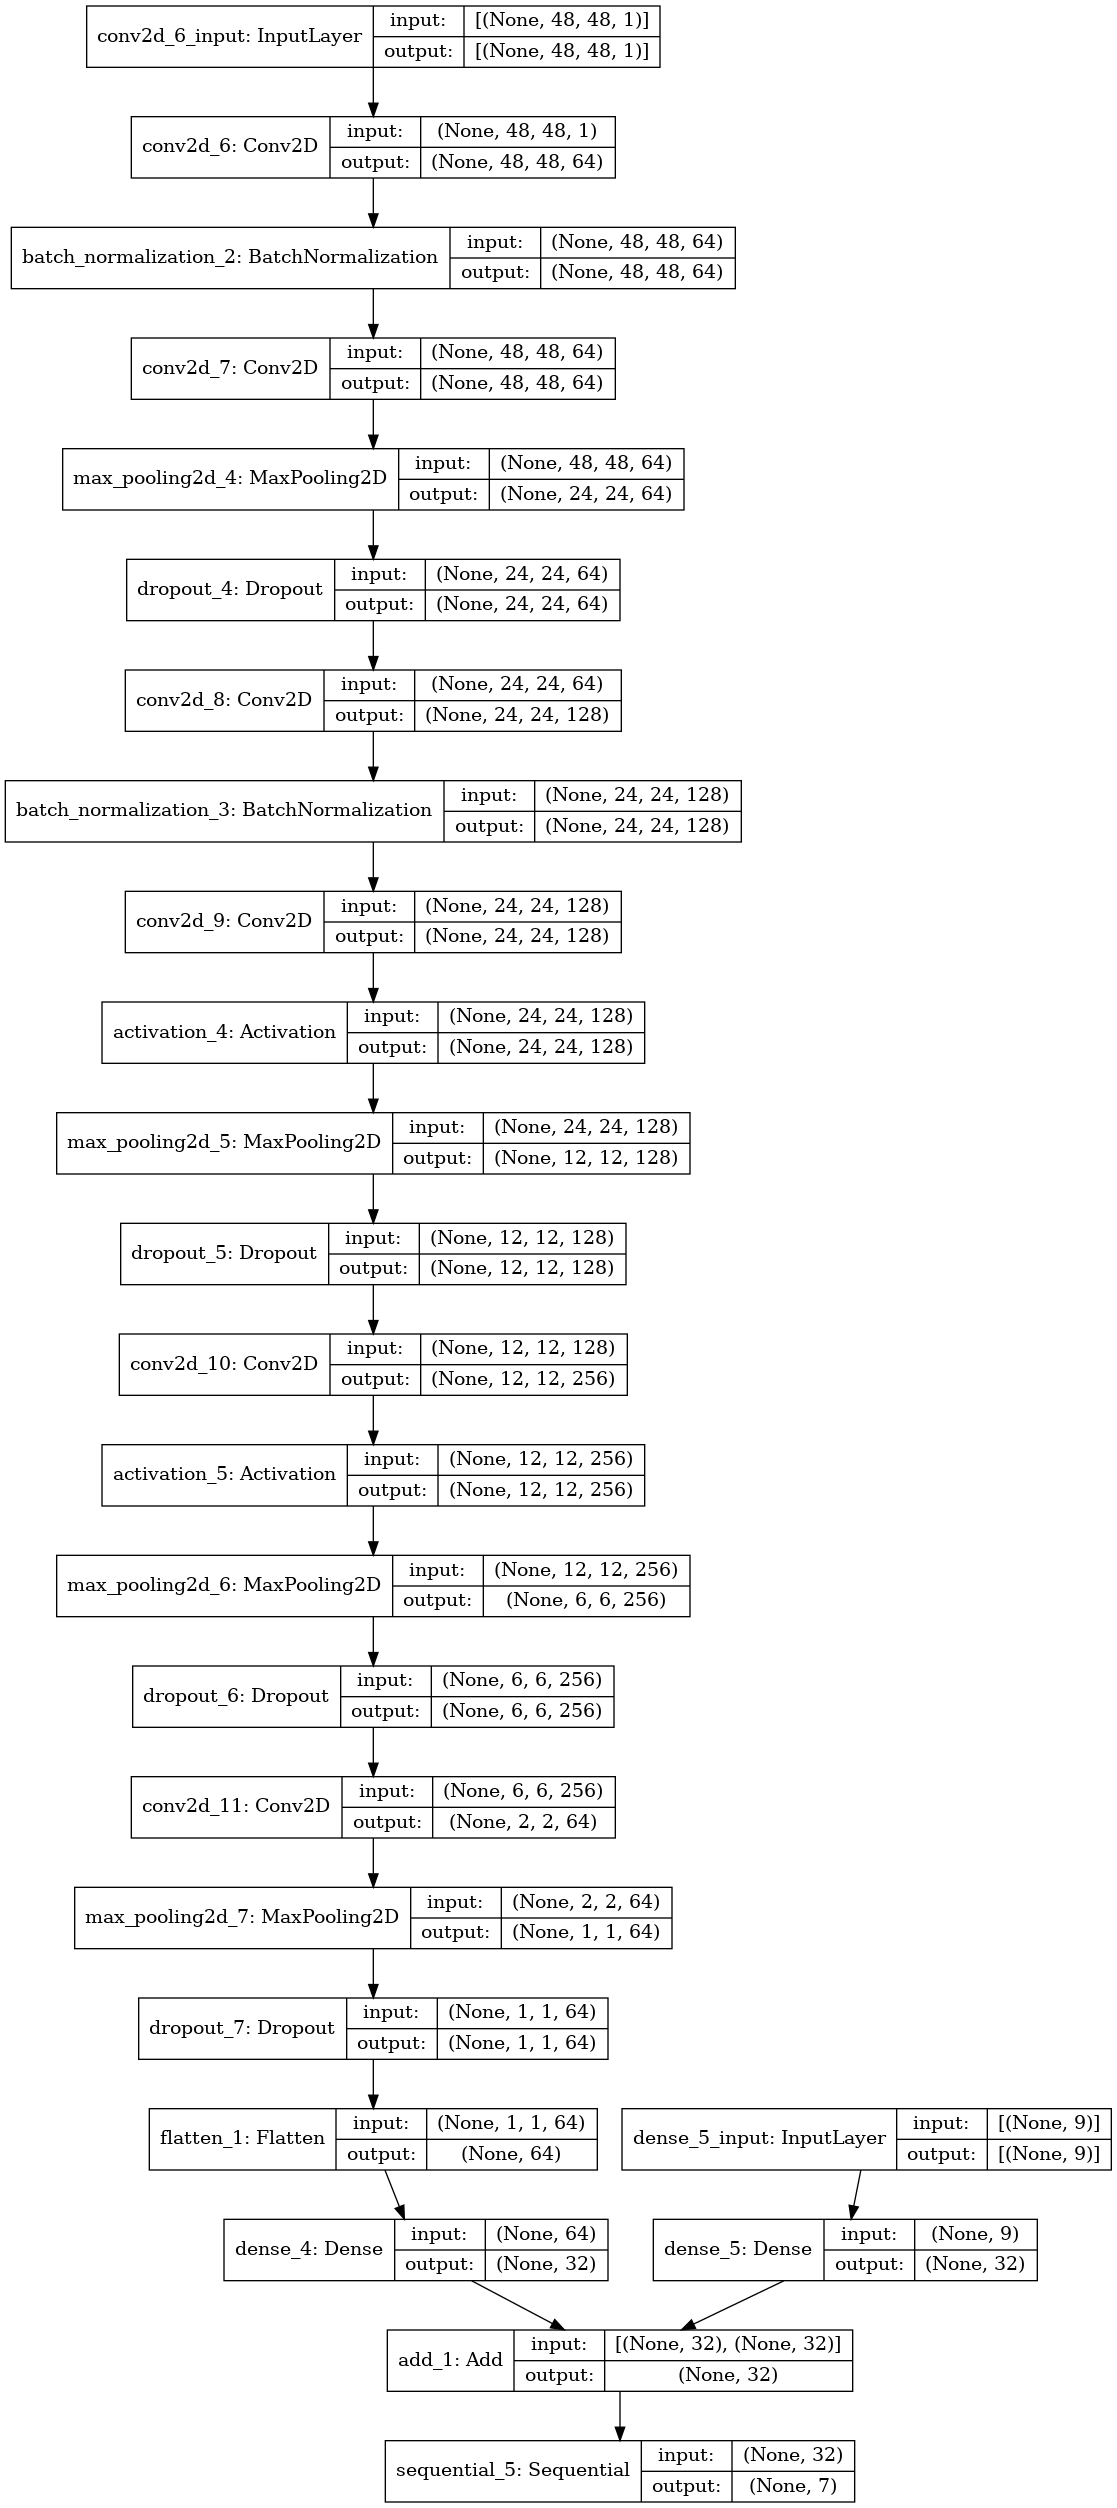

In [17]:


from keras.utils.vis_utils import plot_model
import pydot_ng as pydot



plot_model(final, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing 

scalar = StandardScaler()

X = scalar.fit_transform(data)
print(X)

X = preprocessing.normalize(X, norm='l1')

encoder = LabelEncoder()
encoder.fit(emotion)
y = encoder.transform(emotion)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)
  # Broadcast the server weights to the clients.
print(dummy_y)

[[ 0.45360778 -0.34621177 -0.36296589 ... -1.28115548  0.60709425
   1.27581468]
 [ 0.21210024 -0.52448476  0.06487691 ... -0.52155891 -0.06726181
   0.95186305]
 [-0.24024097  0.27175239 -0.1232561  ...  0.34257807  0.05845285
   0.23652968]
 ...
 [ 1.2836859   0.95772017 -0.23202432 ... -0.307979    0.39077656
   0.82237587]
 [ 1.77771421  1.51243329  0.09407725 ... -0.65366489 -0.62558358
   1.74710241]
 [ 0.79293423  0.77448155 -0.66717621 ... -0.99288809  0.24093149
   1.29752226]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
# tf.keras.backend.set_floatx('float64')

i=range(980)
encoder = LabelEncoder()
encoder.fit(emotion)
y = encoder.transform(emotion)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

faces_1 = faces/255

i_train, i_test = train_test_split(i,test_size=0.2)

X_train=(data.iloc[i_train])
Z_train=(faces_1[i_train])
Y_train=(dummy_y[i_train])
X_test=(data.iloc[i_test])
Y_test=(dummy_y[i_test])
Z_test=(faces_1[i_test])






#([2, 0, 3], [1, 4])

In [20]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *

early = EarlyStopping(monitor="val_loss", mode="min", patience=15)
callbacks_list = [ early]
final.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
history = final.fit([Z_train,X_train], Y_train, epochs=100 ,callbacks=callbacks_list,validation_split=0.3)


Epoch 1/100
18/18 [==============================] - 8s 401ms/step - loss: 19.2902 - accuracy: 0.1420 - val_loss: 15.2889 - val_accuracy: 0.1144
Epoch 2/100
18/18 [==============================] - 7s 389ms/step - loss: 4.1412 - accuracy: 0.2312 - val_loss: 6.4203 - val_accuracy: 0.1398
Epoch 3/100
18/18 [==============================] - 7s 395ms/step - loss: 2.5207 - accuracy: 0.2372 - val_loss: 3.3033 - val_accuracy: 0.1441
Epoch 4/100
18/18 [==============================] - 7s 403ms/step - loss: 1.9598 - accuracy: 0.3055 - val_loss: 2.2825 - val_accuracy: 0.2500
Epoch 5/100
18/18 [==============================] - 7s 410ms/step - loss: 1.6308 - accuracy: 0.3571 - val_loss: 1.6155 - val_accuracy: 0.3602
Epoch 6/100
18/18 [==============================] - 7s 406ms/step - loss: 1.6773 - accuracy: 0.3647 - val_loss: 1.6642 - val_accuracy: 0.3390
Epoch 7/100
18/18 [==============================] - 7s 411ms/step - loss: 1.4741 - accuracy: 0.4415 - val_loss: 1.6151 - val_accuracy: 0.35

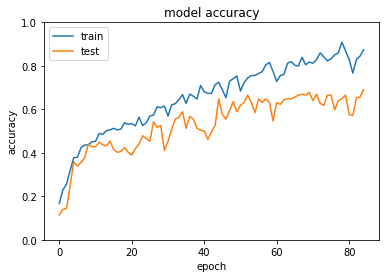

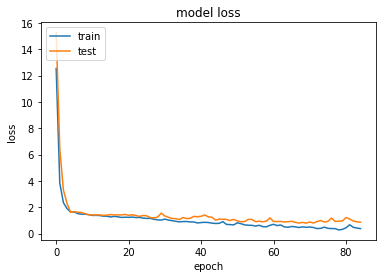

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim((0,1))
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [13]:
sys.getsizeof(final.get_weights())

184

In [13]:
y_pred = final.predict([Z_test,X_test])

print(metrics.accuracy_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))

0.6428571428571429


In [22]:
final.save('AI-hybrid2.hdf5')
